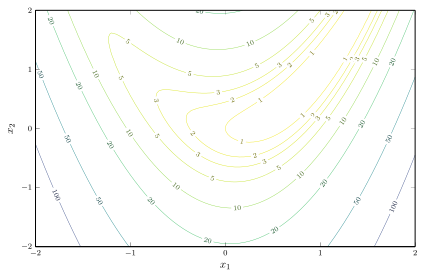

In [25]:
# Gradient Descent
using LinearAlgebra, Dates

# Define function, gradient and hessian
f = x -> (1-x[1])^2 + 5*(x[2] - x[1]^2)^2
∇f = x -> [2*(10*x[1]^3-10*x[1]*x[2]+x[1]-1), 10*(x[2]-x[1]^2)]

x = [-1,-1]

###################################################################################
using Plots, LaTeXStrings, Printf
pgfplotsx()

# add PGFPlotsX (Textlive, MikTeX)

# Rosenbrock function
fp(x1,x2) = (1 - x1)^2 + 5*(x2 - x1^2)^2

x1 = -2:0.05:2
x2 = -2:0.05:2

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels = [1,2,3,5,10,20,50,100], 
    c = cgrad(:viridis, rev = true, scale = :exp),
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-2,2),
    ylims = (-2,2),
    legend = false,
    grid = false,
    contour_labels = true,
    label = false)

In [5]:
function bracket_minimum(f, x=0; s=1e-2, k=2.0)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end

    while true
        c, yc = b + s, f(b + s)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
end

using Base.MathConstants
function fibonacci_search(f, a, b, n; ϵ=0.002)
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : n-1
        if i == n-1
            c = ϵ*a + (1-ϵ)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
    end
    return a < b ? (a, b) : (b, a)
end

fibonacci_search (generic function with 1 method)

In [26]:
function gradient_descent(f, ∇f, x; ϵ = 0.00001, iters = false, plotFig = false, plotFile = false)
    
    # Error
    ϵ0 = 1000
    
    i = 0
    while ϵ0 > ϵ
        # Direction
        g = ∇f(x)
        d = -g/norm(g)
    
        # Choose step size
        objective = α -> f(x + α*d)
        a, b = bracket_minimum(objective)
        α = fibonacci_search(objective, a, b, 100)
    
        xn = x + α[1]*d
    
        y1 = f(x)
        y2 = f(xn)
        
        # Error
        ϵ0 = abs(y1 - y2)
        
        i += 1
        if iters == true
            if i == 1
                println("=="^49)
                timenow = Dates.now()
                timenow1 = Dates.format(timenow, "dd u yyyy HH:MM:SS")
                println(":: Gradient Descent Method :: ", timenow1)
                println("=="^49)
                println(@sprintf("Iter\t x(k)\t\t\t x(k+1)\t\t\t f(xk)\t\t f(xk+1)\t ϵ"))
                println("=="^49)
            end
            
            xs = map(x -> @sprintf("%2.3f",x), x)
            xns = map(x -> @sprintf("%2.3f",x), xn)
            println(@sprintf("%i\t %s\t %s\t %1.3e\t %1.3e\t %1.3e", i, xs, xns, y1, y2, ϵ0)) 
        end
        
        if plotFig == true
            plot!([x[1], xn[1]], [x[2], xn[2]], label="", xlims = (-2,2), ylims = (-2,2))
        end
        
        x = xn
    end
    
    if iters == true
        println("=="^49)
    end
    
    if plotFile != false
        if plotFig == true
            sleep(1)
            display((pl1))
        end
    end
    return x, f(x)
end

gradient_descent (generic function with 1 method)

In [28]:
x_opt, f_min = gradient_descent(f, ∇f, [-1, -1], iters = true)

:: Gradient Descent Method :: 23 Oct 2020 17:25:58
Iter	 x(k)			 x(k+1)			 f(xk)		 f(xk+1)	 ϵ
1	 ["-1.000", "-1.000"]	 ["0.354", "-0.385"]	 2.400e+01	 1.717e+00	 2.228e+01
2	 ["0.354", "-0.385"]	 ["0.191", "-0.026"]	 1.717e+00	 6.740e-01	 1.043e+00
3	 ["0.191", "-0.026"]	 ["0.532", "0.129"]	 6.740e-01	 3.379e-01	 3.361e-01
4	 ["0.532", "0.129"]	 ["0.494", "0.212"]	 3.379e-01	 2.614e-01	 7.652e-02
5	 ["0.494", "0.212"]	 ["0.606", "0.263"]	 2.614e-01	 2.096e-01	 5.185e-02
6	 ["0.606", "0.263"]	 ["0.582", "0.314"]	 2.096e-01	 1.774e-01	 3.212e-02
7	 ["0.582", "0.314"]	 ["0.654", "0.347"]	 1.774e-01	 1.523e-01	 2.510e-02
8	 ["0.654", "0.347"]	 ["0.637", "0.385"]	 1.523e-01	 1.339e-01	 1.841e-02
9	 ["0.637", "0.385"]	 ["0.690", "0.409"]	 1.339e-01	 1.186e-01	 1.531e-02
10	 ["0.690", "0.409"]	 ["0.676", "0.439"]	 1.186e-01	 1.065e-01	 1.213e-02
11	 ["0.676", "0.439"]	 ["0.718", "0.458"]	 1.065e-01	 9.604e-02	 1.045e-02
12	 ["0.718", "0.458"]	 ["0.707", "0.483"]	 9.604e-02	 8.739e-02	 8.650e-

([0.983540455077287, 0.9651754098704806], 0.0002946005717445278)